### Batch: DI_VIP 2023
### ML and Data Science Internship
### Level 1: Beginner Level
#### Intern: Khushboo Singh¶

### Task 2: Fake News Detection

### BUSINESS CASE: Develop an machine learning algorithm or model that can accurately classify news articles as either real or fake based on a set of input features. This may involve using natural language processing (NLP) techniques to analyze the text of the article, as well as other features stored in the dataset

In [2]:
# Importing necessary Libraries
import numpy as np
import pandas as pd
from matplotlib.pylab import plt
import seaborn as sns
from sklearn import metrics
from sklearn.metrics import confusion_matrix , classification_report
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.model_selection import train_test_split
import re
from nltk.corpus import stopwords
from nltk.stem.porter import PorterStemmer
import nltk

In [3]:
# Loading the data
data = pd.read_csv('WELFake_Dataset.csv')
data

,Unnamed: 0,title,text,label
0,0,LAW ENFORCEMENT ON HIGH ALERT Following Threat...,No comment is expected from Barack Obama Membe...,1
1,1,NaN,Did they post their votes for Hillary already?,1
2,2,UNBELIEVABLE! OBAMA’S ATTORNEY GENERAL SAYS MO...,"Now, most of the demonstrators gathered last ...",1
3,3,"Bobby Jindal, raised Hindu, uses story of Chri...",A dozen politically active pastors came here f...,0
4,4,SATAN 2: Russia unvelis an image of its terrif...,"The RS-28 Sarmat missile, dubbed Satan 2, will...",1
...,...,...,...,...
72129,72129,Russians steal research on Trump in hack of U....,WASHINGTON (Reuters) - Hackers believed to be ...,0
72130,72130,WATCH: Giuliani Demands That Democrats Apolog...,"You know, because in fantasyland Republicans n...",1
72131,72131,Migrants Refuse To Leave Train At Refugee Camp...,Migrants Refuse To Leave Train At Refugee Camp...,0
72132,72132,Trump tussle gives unpopular Mexican leader mu...,MEXICO CITY (Reuters) - Donald Trump’s combati...,0


### Basic Chcks

In [5]:
# First five rows
data.head()

,Unnamed: 0,title,text,label
0,0,LAW ENFORCEMENT ON HIGH ALERT Following Threat...,No comment is expected from Barack Obama Membe...,1
1,1,NaN,Did they post their votes for Hillary already?,1
2,2,UNBELIEVABLE! OBAMA’S ATTORNEY GENERAL SAYS MO...,"Now, most of the demonstrators gathered last ...",1
3,3,"Bobby Jindal, raised Hindu, uses story of Chri...",A dozen politically active pastors came here f...,0
4,4,SATAN 2: Russia unvelis an image of its terrif...,"The RS-28 Sarmat missile, dubbed Satan 2, will...",1


In [6]:
# Last five rows
data.tail()

,Unnamed: 0,title,text,label
72129,72129,Russians steal research on Trump in hack of U....,WASHINGTON (Reuters) - Hackers believed to be ...,0
72130,72130,WATCH: Giuliani Demands That Democrats Apolog...,"You know, because in fantasyland Republicans n...",1
72131,72131,Migrants Refuse To Leave Train At Refugee Camp...,Migrants Refuse To Leave Train At Refugee Camp...,0
72132,72132,Trump tussle gives unpopular Mexican leader mu...,MEXICO CITY (Reuters) - Donald Trump’s combati...,0
72133,72133,Goldman Sachs Endorses Hillary Clinton For Pre...,Goldman Sachs Endorses Hillary Clinton For Pre...,1


In [8]:
# Statistics of data
data.describe()

,Unnamed: 0,label
count,72134.000000,72134.000000
mean,36066.500000,0.514404
std,20823.436496,0.499796
min,0.000000,0.000000
25%,18033.250000,0.000000
50%,36066.500000,1.000000
75%,54099.750000,1.000000
max,72133.000000,1.000000


In [9]:
# Information of data
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 72134 entries, 0 to 72133
Data columns (total 4 columns):
 #   Column      Non-Null Count  Dtype 
---  ------      --------------  ----- 
 0   Unnamed: 0  72134 non-null  int64 
 1   title       71576 non-null  object
 2   text        72095 non-null  object
 3   label       72134 non-null  int64 
dtypes: int64(2), object(2)
memory usage: 2.2+ MB


In [10]:
#Shape of data
data.shape

(72134, 4)

In [12]:
# Columns of data
data.columns

Index(['Unnamed: 0', 'title', 'text', 'label'], dtype='object')

In [16]:
# Missing values
data.isnull().sum()

title    558
text      39
label      0
dtype: int64

In [13]:
y = data.label
print(f'Ratio of real and fake news:')
y.value_counts(normalize=True).rename({1: 'real', 0: 'fake'})

Ratio of real and fake news:


real    0.514404
fake    0.485596
Name: label, dtype: float64

In [14]:
data.drop(["Unnamed: 0"], axis=1, inplace=True)

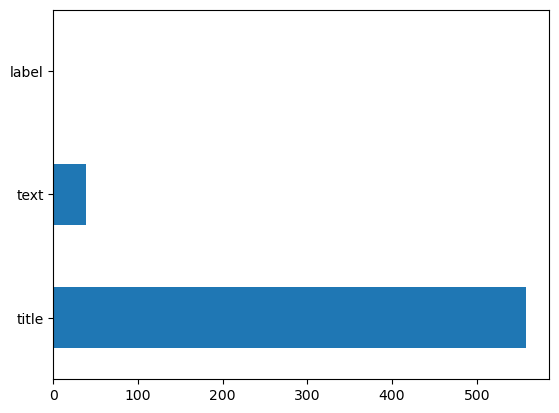

In [15]:
data.isnull().sum().plot(kind="barh")
plt.show()

### Insights:
* Percentage of Real and fake News articles:
real : 51%
fake :49%

* Missing values are present in the dataset

* Label is the target variable


In [17]:
data = data.fillna('')

In [18]:
data.isnull().sum()

title    0
text     0
label    0
dtype: int64

In [19]:
data.nunique()

title    62348
text     62719
label        2
dtype: int64

In [20]:
data["title_text"] = data["title"] + data["text"]
data["body_len"] = data["title_text"].apply(lambda x: len(x) - x.count(" "))
data.head()

,title,text,label,title_text,body_len
0,LAW ENFORCEMENT ON HIGH ALERT Following Threat...,No comment is expected from Barack Obama Membe...,1,LAW ENFORCEMENT ON HIGH ALERT Following Threat...,4222
1,,Did they post their votes for Hillary already?,1,Did they post their votes for Hillary already?,39
2,UNBELIEVABLE! OBAMA’S ATTORNEY GENERAL SAYS MO...,"Now, most of the demonstrators gathered last ...",1,UNBELIEVABLE! OBAMA’S ATTORNEY GENERAL SAYS MO...,299
3,"Bobby Jindal, raised Hindu, uses story of Chri...",A dozen politically active pastors came here f...,0,"Bobby Jindal, raised Hindu, uses story of Chri...",6811
4,SATAN 2: Russia unvelis an image of its terrif...,"The RS-28 Sarmat missile, dubbed Satan 2, will...",1,SATAN 2: Russia unvelis an image of its terrif...,1668


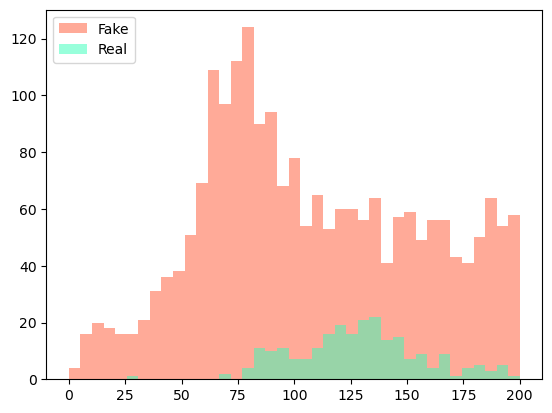

In [21]:
bins = np.linspace(0, 200, 40)

plt.hist(data[data["label"]== 1]["body_len"], bins, alpha=0.5, label="Fake", color="#FF5733")
plt.hist(data[data["label"]== 0]["body_len"], bins, alpha=0.5, label="Real", color="#33FFB8")
plt.legend(loc="upper left")
plt.show()

#### Insight: 

Fake news seem to be quite a bit longer than real news.

Text(0.5, 1.0, 'Distribution of Fake/Real News')

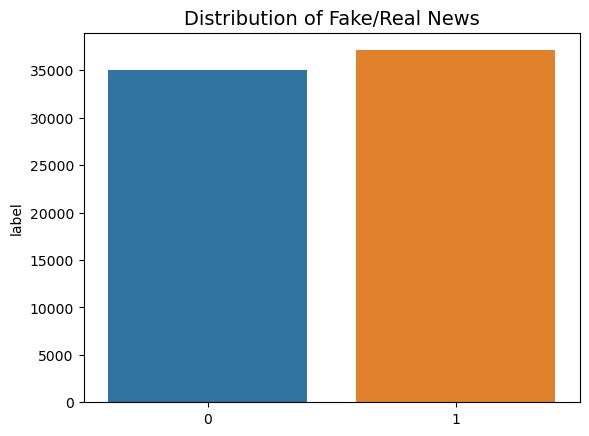

In [22]:
class_names = ['fake', 'real'] 
label_count = data.label.value_counts()
sns.barplot(x=label_count.index, y=label_count)
plt.title('Distribution of Fake/Real News',fontsize =14)

In [23]:
y.head()

0    1
1    1
2    1
3    0
4    1
Name: label, dtype: int64

In [25]:
pip install wordcloud

                                              0.0/151.4 kB ? eta -:--:--
     -------                               30.7/151.4 kB 660.6 kB/s eta 0:00:01
     ----------                            41.0/151.4 kB 393.8 kB/s eta 0:00:01
     --------------------------           112.6/151.4 kB 819.2 kB/s eta 0:00:01
     ------------------------------------ 151.4/151.4 kB 820.9 kB/s eta 0:00:00
Note: you may need to restart the kernel to use updated packages.


In [26]:
from wordcloud import WordCloud

In [30]:
X_train, X_test, y_train, y_test = train_test_split(data['text'], y, test_size=0.33, random_state=53)

### Data Visualisation 

* News Titles

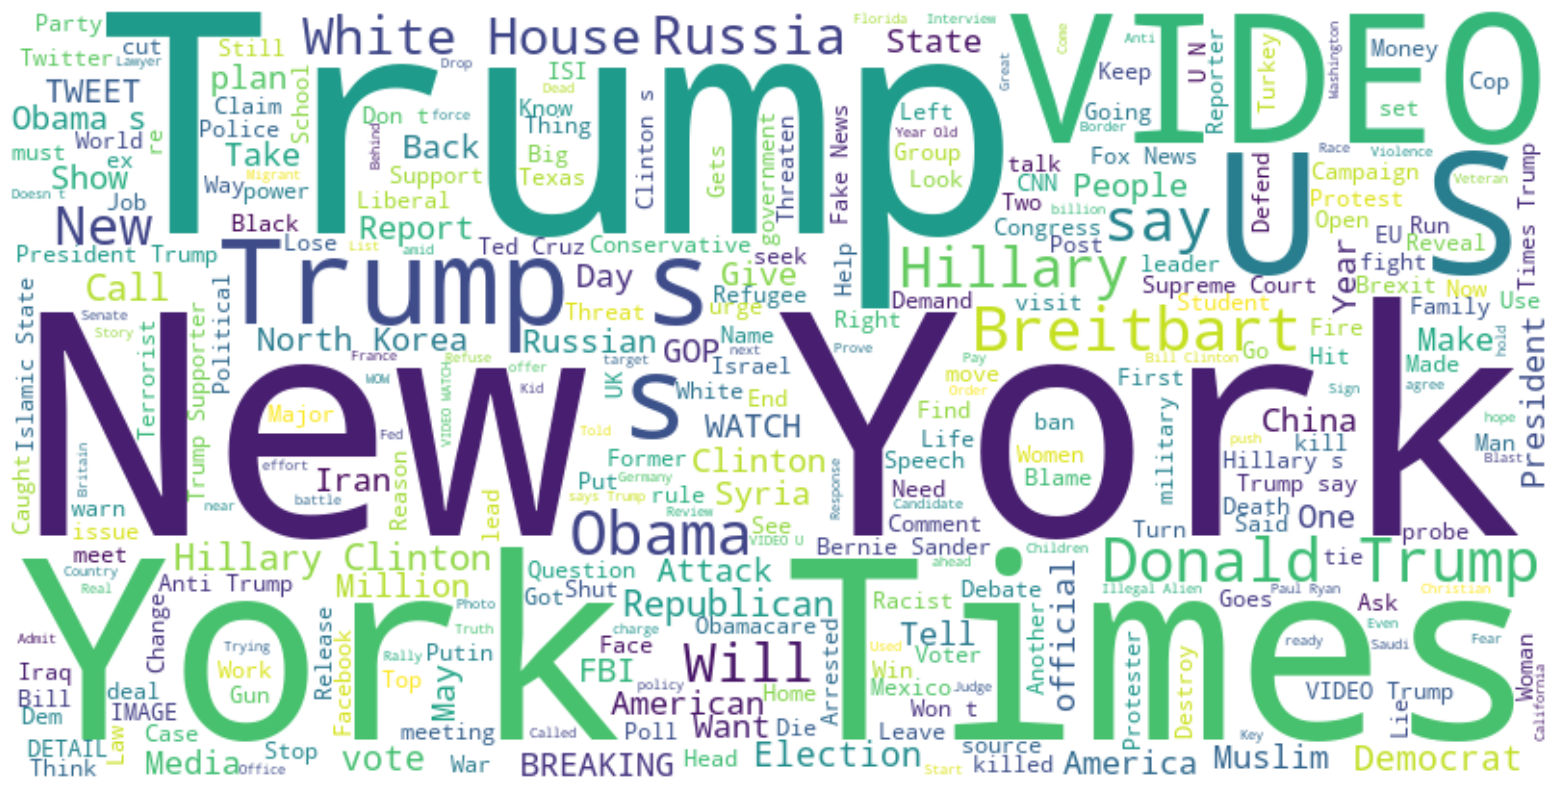

In [28]:
titles = ' '.join(title for title in data['title'])
wordcloud = WordCloud(
    background_color='white', 
    max_words=300,
    width=800, 
    height=400,
).generate(titles)

plt.figure(figsize=(20, 10))
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis("off")
plt.show()

#### Insights:
Most of the news articles are about elections and presidents of USA.

* Texts in fake news

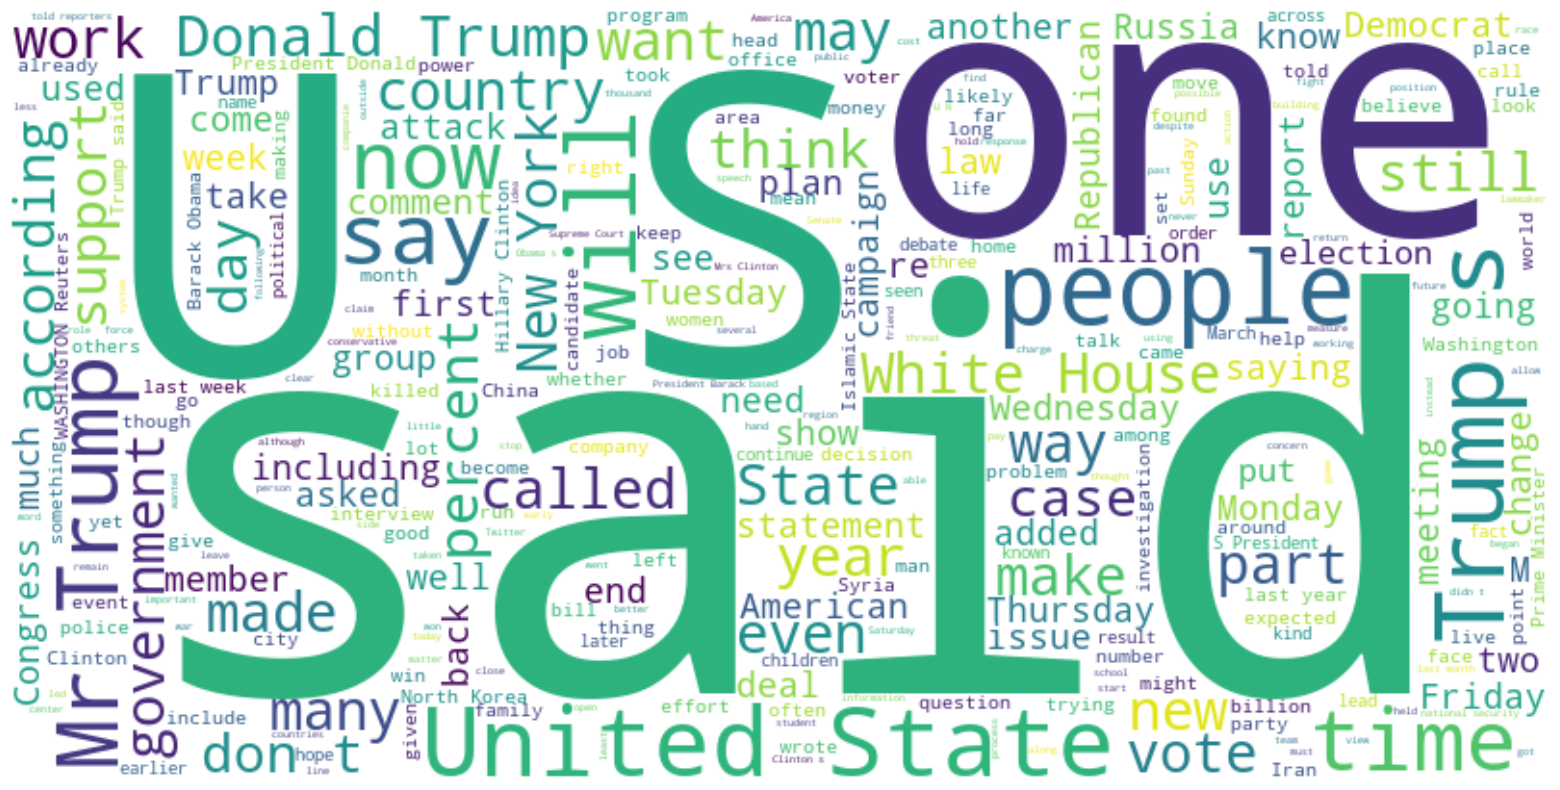

In [31]:
fake_news = X_train[y_train == 0]
real_news = X_train[y_train == 1]
fake_texts = ' '.join(text for text in fake_news)
wordcloud = WordCloud(
    background_color='white', 
    max_words=300,
    width=800, 
    height=400,
).generate(fake_texts)

plt.figure(figsize=(20, 10))
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis("off")
plt.show()

In [32]:
count_vectorizer = CountVectorizer(stop_words='english')
count_train = count_vectorizer.fit_transform(X_train)
count_test = count_vectorizer.transform(X_test)

### Naive Bayes Algorithm

In [33]:
from sklearn.naive_bayes import MultinomialNB
nb_classifier = MultinomialNB()
nb_classifier.fit(count_train, y_train)

MultinomialNB()

In [35]:
pred = nb_classifier.predict(count_test)
pred

array([0, 0, 1, ..., 0, 1, 1], dtype=int64)

In [36]:
print(classification_report(y_test, pred))

              precision    recall  f1-score   support

           0       0.87      0.91      0.89     11640
           1       0.91      0.87      0.89     12165

    accuracy                           0.89     23805
   macro avg       0.89      0.89      0.89     23805
weighted avg       0.89      0.89      0.89     23805



Text(70.72222222222221, 0.5, 'Real Labels')

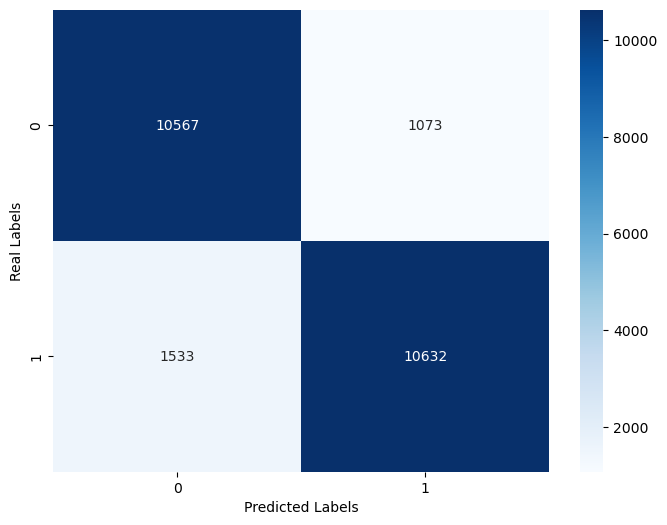

In [37]:
plt.figure(figsize = (8,6))

sns.heatmap(confusion_matrix(y_test,pred), annot=True, 
            fmt='', cmap='Blues')

plt.xlabel('Predicted Labels')
plt.ylabel('Real Labels')